In [2]:
%pip install quantumaudio
%pip install qiskit
%pip install qiskit_finance
%pip install qiskit_machine_learning

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 2.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 48.1 MB/s eta 0:00:00:00:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import quantumaudio as qa
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit_ionq import IonQProvider
%matplotlib inline
from qiskit_finance import QiskitFinanceError
from qiskit_finance.data_providers import *
import datetime
from pandas.plotting import register_matplotlib_converters
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.neural_networks import EstimatorQNN

algorithm_globals.random_seed = 42

register_matplotlib_converters()
provider = IonQProvider("1WDH92XLnf1UqaMyOZT9qvyUfAXEGzX4")

In [14]:
def run_on_simulator(circuit):
    # load backend by using the get_backend method
    backend = provider.get_backend("ionq_simulator")
    # submit the circuit
    job = backend.run(circuit)
    
    # poll for the job's result   
    results = job.result()
    
    return results

In [15]:
data_set_E = [0, 0.5, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0]
data_set_D_sharp = [0.25, 0, 0, 0.25, 0.25, 0, 0.25, 0, 0, 0, 0, 0]
data_set_C_sharp = [0, 0, 0.33, 0, 0.33, 0.33, 0, 0, 0, 0, 0, 0]
data_set_G = [0, 0.33, 0, 0.33, 0, 0, 0, 0.33, 0, 0, 0, 0]
data_set_D = [0, 0.25, 0.25, 0, 0, 0, 0.25, 0, 0.25, 0, 0, 0]
data_set_F = [0.25, 0, 0.25, 0, 0, 0, 0, 0.25, 0, 0.25, 0, 0]

data_set_C = [0, 0.25, 0, 0, 0.25, 0, 0, 0, 0.25, 0, 0.25, 0]
data_set_F_sharp = [0, 0, 0, 0.25, 0, 0.25, 0, 0, 0, 0.25, 0.25, 0]
data_set_A = [0, 0, 0, 0, 0.25, 0, 0.25, 0.25, 0, 0.25, 0, 0.25]
data_set_G_sharp = [0, 0, 0, 0, 0, 0.25, 0, 0.25, 0.25, 0, 0.25, 0]
data_set_B = [0, 0, 0, 0, 0, 0, 0.25, 0.25, 0, 0.25, 0, 0.25]
data_set_A_sharp = [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0]

all_data_sets = []

all_data_sets.append(data_set_E)
all_data_sets.append(data_set_D_sharp)
all_data_sets.append(data_set_C_sharp)
all_data_sets.append(data_set_G)
all_data_sets.append(data_set_D)
all_data_sets.append(data_set_F)

all_data_sets.append(data_set_C)
all_data_sets.append(data_set_A)
all_data_sets.append(data_set_B)
all_data_sets.append(data_set_F_sharp)
all_data_sets.append(data_set_G_sharp)
all_data_sets.append(data_set_A_sharp)

In [16]:
def normalize(given_list):
    list_min = min(given_list)
    list_max = max(given_list)
    
    normalized_list = [(2*np.pi*(given_list_item - list_min))/list_max 
                       for given_list_item in given_list]
    
    return normalized_list

def unnormalize(given_list, reference_list):
    list_min = min(reference_list)
    list_max = max(reference_list)
    
    unnormalized_list = [(list_max*given_list_item)/(2*np.pi) + list_min
                        for given_list_item in given_list]
    
    return unnormalized_list

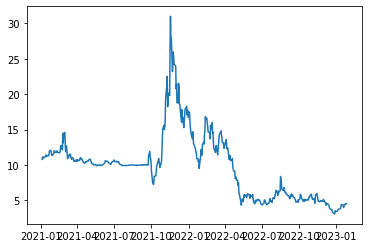

In [17]:
try:
    data = YahooDataProvider(
        tickers=["IONQ"],
        start=datetime.datetime(2021, 1, 1),
        end=datetime.datetime(2023, 1, 27),
    )
    data.run()
    for (cnt, s) in enumerate(data._tickers):
        plt.plot(data._data[cnt], label=s)
        IONQ_prices = data._data[cnt]
        
except QiskitFinanceError as ex:
    data = None
    print(ex)

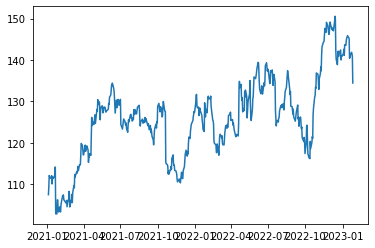

In [18]:
data = YahooDataProvider(
        tickers=["IBM"],
        start=datetime.datetime(2021, 1, 1),
        end=datetime.datetime(2023, 1, 27),
    )

data.run()

for (cnt, s) in enumerate(data._tickers):
        plt.plot(data._data[cnt], label=s)
        ticker_data = data._data[cnt]
        
IBM_prices = []

for i in range(len(ticker_data)):
    IBM_prices.append(ticker_data[i])
    
normalized_IBM_prices = normalize(IBM_prices)
normalized_IONQ_prices = normalize(IONQ_prices)

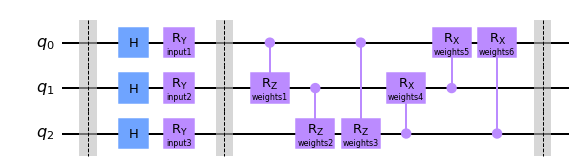

In [19]:
# construct the parametrized circuit
params1 = Parameter("input1")
params2 = Parameter("input2")
params3 = Parameter("input3")

weights = [Parameter("weights1"), 
           Parameter("weights2"),
           Parameter("weights3"),
           Parameter("weights4"),
           Parameter("weights5"),
           Parameter("weights6")]
           
qc1 = QuantumCircuit(3)

qc1.barrier()

qc1.h(0)
qc1.h(1)
qc1.h(2)

qc1.ry(params1, 0)
qc1.ry(params2, 1)
qc1.ry(params3, 2)

qc1.barrier()

qc1.crz(weights[0],0,1)
qc1.crz(weights[1],1,2)
qc1.crz(weights[2],0,2)

qc1.crx(weights[3],2,1)
qc1.crx(weights[4],1,0)
qc1.crx(weights[5],2,0)


qc1.crz

qc1.barrier()

qc1.draw("mpl")

In [20]:
from qiskit.quantum_info import SparsePauliOp
import math

observable1 = SparsePauliOp.from_list([("X" * qc1.num_qubits, 1)])
observable2 = SparsePauliOp.from_list([("Y" * qc1.num_qubits, 1)])
observable3 = SparsePauliOp.from_list([("Z" * qc1.num_qubits, 1)])

In [21]:
# HERE IS THE NEURAL NETWORK
qnn1 = EstimatorQNN(
    circuit=qc1, observables=[observable1,observable2,observable3], input_params=[params1, params2, params3], weight_params=weights)

In [22]:
'''
This section takes care of the train/test split of the data set, which 
all other functions in the neural network will call upon to find sample 
train or test points.
'''

import random

train_set = []
test_set = []

def train_test_split(len_data, train_percentage):
    '''
    Splits the numbers from 0 to len_data - 20 into
    a train and test set depending on what percentage of the data
    goes into the training set
    '''
    train_set = random.sample(range(0, len_data - 20), round(len_data * train_percentage))
    test_set = [i for i in range(len_data - 20) if i not in train_set]
    return train_set, test_set

In [16]:
def train_predict_stock_price(num_days_from_now, train_set):
    '''
    Given an integer representing how many days from now we are training the model
    to predict the price of the stock, we train the model to predict the price
    
    X_train is whatever data we chose to use for the model
    y_train is the price of the stock since 
    '''
    weights = [100,100,100,100,100,100]
    
    for _ in range(10):
        # define input and weights based on a random day in the past
        random_day_selection = train_set[np.random.randint(0,len(train_set))]
        inputs = [normalized_IBM_prices[random_day_selection]]*3
        act_price = normalized_IONQ_prices[random_day_selection + num_days_from_now]
    
        # QNN forward pass
        input_layer = inputs
        output_layer = qnn1.forward(input_layer, weights)[0]

        # price prediction
        pred_price = (output_layer[0] + output_layer[1] + output_layer[2]) / -0.5

        #print("predicted price: ", pred_price, " with weights: ", weights) # useful for debugging

        # updating the weights
        grad = qnn1.backward(input_layer, weights)
        weights = weights - (pred_price - act_price) * 10 * (qnn1.backward(inputs, weights)[1][0][0] 
                                                        + qnn1.backward(inputs, weights)[1][0][1] 
                                                        + qnn1.backward(inputs, weights)[1][0][2])

    return [weights]

#train_predict_stock_price(2,[1,15,17,25,55,50,20,0,52,60,70,19])

In [17]:
import time

def train_predictor_fully(train_set):
    '''
    Trains the neural net to predict the stock price for the 
    next 20 days for which the market is open
    '''
    weights = []
    
    for num_days_from_now in range(20):
        time1 = time.time()
        weights.append(train_predict_stock_price(num_days_from_now, train_set))
        time2 = time.time()
        amt_time = time2 - time1
        print("Completed neural network", num_days_from_now + 1, "of 20,", "took", amt_time, "secs")
        
    return weights

In [18]:
def test_run(given_weights, X):
    '''
    Performs a single test run (forward pass) of the
    neural network for a given set of inputs and weights
    '''
    # QNN forward pass
    input_layer = [X] * 3
    output_layer = qnn1.forward(input_layer, given_weights)[0]

    # price prediction
    pred_price = (output_layer[0] + output_layer[1] + output_layer[2]) / -0.5
    return pred_price

In [19]:
def test_predictor(weights, test_set):
    '''
    Finds the MSE between the neural network predictions 
    and actual stock price values
    '''
    MSE = 0
    
    for _ in range(5):
        # we can't go less than 20 days from present
        random_day_selection = test_set[np.random.randint(0,len(test_set))]
        num_days_from_now = np.random.randint(0,20)
        
        # Choose a random day and test how close IBM prices are to IONQ prices
        X = normalized_IBM_prices[random_day_selection]
        act_price = normalized_IONQ_prices[random_day_selection + num_days_from_now]
        pred_price = test_run(weights[num_days_from_now], X)
        
        MSE += (act_price - pred_price) ** 2
        
    return MSE

In [20]:
def run_network():
    '''
    Trains and then tests the neural network, printing the accuracy
    through the MSE calculation. Finally, it provides a list of 20 values 
    that will be fed into the second part of the 2023 iQuHack project
    with the Qrabs team.
    '''
    train_set, test_set = train_test_split(len(normalized_IONQ_prices), train_percentage = 0.75)
    weights = train_predictor_fully(train_set)
    MSE = test_predictor(weights, test_set)
    print("The MSE for this network is:", MSE)
    
    return weights

In [21]:
# Providing predictions for today's future 20 business days
weights = run_network()
X = normalized_IBM_prices[-1]
pred_prices_arr = []

for num_days_from_now in range(20):
    pred_price = test_run(weights[num_days_from_now], X)
    pred_prices_arr.append(pred_price)

print(unnormalize(pred_prices_arr, IONQ_prices))

Completed neural network 1 of 20, took 7.173507452011108 secs
Completed neural network 2 of 20, took 6.905392408370972 secs
Completed neural network 3 of 20, took 6.939301013946533 secs
Completed neural network 4 of 20, took 6.887789011001587 secs
Completed neural network 5 of 20, took 6.986464023590088 secs
Completed neural network 6 of 20, took 6.920984745025635 secs
Completed neural network 7 of 20, took 6.955182790756226 secs
Completed neural network 8 of 20, took 6.92981743812561 secs
Completed neural network 9 of 20, took 6.878678560256958 secs
Completed neural network 10 of 20, took 6.983430624008179 secs
Completed neural network 11 of 20, took 6.84405255317688 secs
Completed neural network 12 of 20, took 6.876043081283569 secs
Completed neural network 13 of 20, took 6.987048387527466 secs
Completed neural network 14 of 20, took 6.9461588859558105 secs
Completed neural network 15 of 20, took 7.026721954345703 secs
Completed neural network 16 of 20, took 6.84121298789978 secs
Com

In [23]:
def slope_values():
    values = unnormalized(pred_prives_arr, IONQ_prices)
    
    slope_values = []
    
    for i in range(len(values)):
        if (i+1) < len(values):
            slope_values.append(values[i+1]-values[i])
            
    return slope_values

In [25]:
def tempo():
    values = unnormalized(pred_prives_arr, IONQ_prices)
    i = values[len(values)] - values[0]
    if i > 0:
        tempo = 120
    elif i < 0:
        tempo = 80
    else:
        tempo = 100
    return tempo

In [26]:
def tri_tones(slope_values:list):
    sad_notes = []
    for i in range(len(slope_values)):
        if slope_values[i] < 0:
            sad_notes.append(i)
    return sad_notes

In [1]:
def note_weight(note):
    j = 0
    for i in range(len(all_data_sets[note])):
        if all_data_sets[note][i] > 0:
            j = j + 1
    return j

In [28]:
def note_type():
    
    circuit = QuantumCircuit(3,3)
    
    for i in range(3):
        circuit.h(i)
        
    for i in range(3):
        circuit.measure(i,i)
        
    results = run_on_simulator(circuit)
    counts = results.get_counts()
    
    b = max(counts, key=counts.get)
    
    note_type = int(b, 2)
    
    return note_type

In [2]:
#add 1 parameter to the function that takes an int note

def pitch_perfect():
    
    circuit = QuantumCircuit(2,2)

    for i in range(2):
        circuit.h(i)

    for i in range(2):
        circuit.measure(i,i)
    
    return circuit

In [12]:
def pitch(note_num : int):
    circuit = QuantumCircuit(4,4)
    
    for i in range(4):
        circuit.h(i)

    for i in range(4):
        circuit.measure(i,i)

    results = run_on_simulator(circuit)
    counts = results.get_counts()
    
    for i in range(4):
        counts.popitem()
            
    b = max(counts, key=counts.get)
    
    note = int(b, 2)
            
    i = 1
        
    note_order = []
    
    note_order.append(note)

    while i < note_num:
        j = note_weight(note)
        
        results = run_on_simulator(pitch_perfect())
        counts = results.get_counts()
        
        if len(counts) > 12:
            if j < 4:
                for g in range(4-j):
                    counts.popitem()
            
        b = max(counts, key=counts.get)
        next_note = int(b, 2) + 1
        
        l = 0
        
        for k in range(len(all_data_sets[note])):
            if all_data_sets[int(note)][int(k)] > 0:
                l = l + 1
            if l == next_note:
                note = k
                break
                
        note_order.append(note)
        i = i + 1
    print(note_order)
    return note_order

[3, 7, 6, 4, 8]


[3, 7, 6, 4, 8]

In [ ]:
def final_product(note_num:int):
    print("the note pitches are:" , pitch(20))
    print("the order of note types is:" , note_type())
    print("the note with tritones are:" , tri_tones(slope_values()))
    print("the tempo is:" , tempo())
final_product(20)